Imports

In [3]:
import sys
sys.path.append('../')

In [4]:
from scripts.utils import data_path, set_mpl
from scripts.catalog import get_expo_map, lnls_xy
from tqdm import tqdm
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import seaborn as sns
%matplotlib inline

# Catalog 
Read catalog and mask stars

In [5]:

xcat = pd.read_pickle(data_path+'lhpv_03_23_sd01_a15_g14.pkl')

#mask = xcat.gaia_star == False
#xcat = xcat[mask]

# mask_stars = '''
#     ~(
#         sep_gaia<20  & 
#         (
#         (prlx_sn>4) | (pmdec_sn>4) | (pmra_sn>4)
#         )
#     )
#     '''
# mask_stars = mask_stars.replace('\n', ' ')
# mask_stars = mask_stars.replace(' ', '')


# xcat = xcat.query(mask_stars)
xcat.head(4)

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH
0,SRGe J103744.3+571156,159.434594,57.198788,151.771105,51.782607,2.041112,26414.902344,3.284168e-12,3.904461e-13,15460.503906,1838.058594,4300.765625,0.000000,0.000000,0.000000,1,1,159.436603,57.197499,0.318530,6.785297,0.000011,6.268413e+08,6.270701e+08,0.00000,0.000000,3.594826,0.427379,20.898417,159.434594,57.198788,853989860956388736,6.040749,1,0,15.749939,-1.0,0,87GB 103431.3+572750,0.8307,BLLac,6.040664,4,1,1,1,12.218,11.328000,9.144,46.2,51.7,34.4,1,3,1,1237658303278743603,7980433077213351936,6.099201,65741514189,0.318530,0.729711,1.101567,1.786149,134.901685,44.066998,2.527295e-12,5.451755e+19
1,SRGe J110137.5+572926,165.406353,57.490464,147.861359,53.996717,2.144203,5344.646973,1.969860e-12,5.570020e-14,1436.945923,40.631405,666.426941,0.000000,0.000000,0.000000,21,14,165.408362,57.489175,0.433455,41.040825,0.000030,6.268413e+08,6.270701e+08,0.00000,0.000000,2.156194,0.060969,4.025409,165.406353,57.490464,857143329024245888,7.121849,2,1,10.012074,NaN,0,HD 237963,NaN,Star,7.105646,1,1,0,0,8.146,8.155000,8.124,47.2,55.3,51.5,1,3,1,1237658302206378052,0,3.844748,64609311305,0.433455,0.766567,1.157204,1.876362,138.528408,46.042071,1.515884e-12,7.056474e+19
2,SRGe J105825.0+564723,164.604366,56.789762,149.231616,54.182274,11.631539,347.521820,1.817511e-12,9.707034e-14,1270.812012,67.872032,638.780701,38.636799,109.107346,2.316356,570,473,164.606375,56.788472,5.134762,81.047668,0.000027,6.268413e+08,6.270701e+08,2.26845,2.364263,1.989434,0.106252,60.279346,164.604366,56.789762,-1,-1.000000,0,-1,NaN,-1.0,-1,ACO 1132,0.1351,ClG,11.712927,1,1,1,0,17.020,17.349001,12.590,10.7,2.3,0.9,2,0,-1,0,0,NaN,67345202611,5.134762,4.158354,6.277419,10.178598,138.559114,45.217538,1.398646e-12,8.566532e+19
3,SRGe J110537.6+585120,166.406669,58.855424,145.639441,53.356921,2.076665,9683.065430,1.505411e-12,9.148949e-14,3063.068848,186.154160,1858.869995,0.000000,0.000000,0.000000,7,4,166.408677,58.854134,0.361642,46.541451,0.000013,6.268413e+08,6.270701e+08,0.00000,0.000000,1.647812,0.100144,8.487207,166.406669,58.855424,860383349272777344,6.884830,3,0,16.935423,-1.0,0,2MASS J11053761+5851208,0.1910,Seyfert_1,6.883267,1,1,0,1,11.276,10.261000,7.624,46.9,54.1,57.8,1,3,0,1237655108373839879,7996392488641515520,6.898202,59429013246,0.361642,0.742422,1.120754,1.817260,138.042449,47.467010,1.158473e-12,6.881141e+19


Priliminary analysis of the catalog

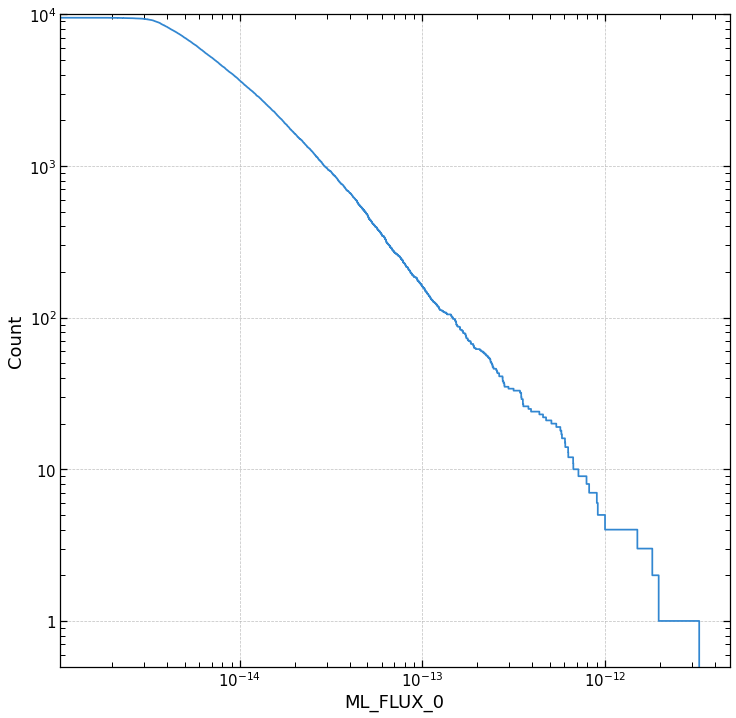

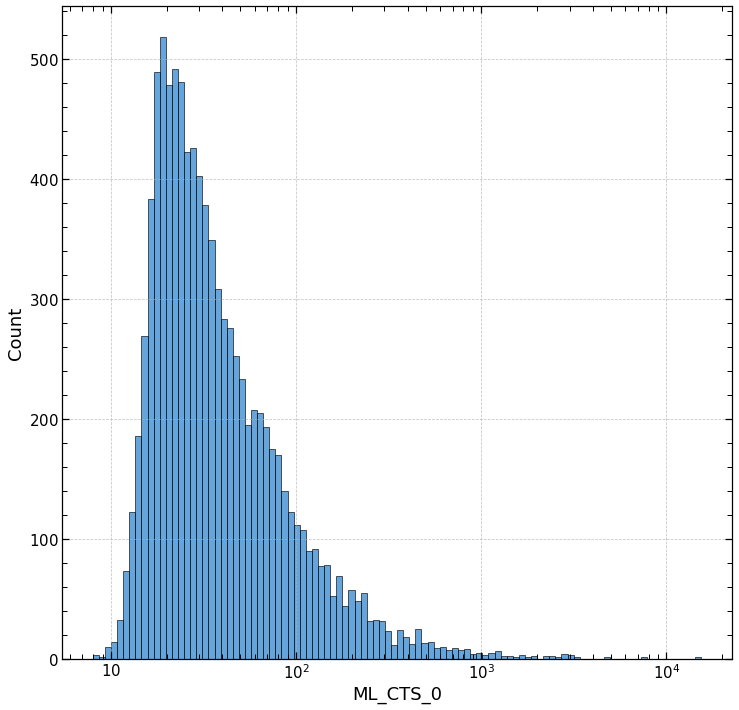

In [6]:
fig,  ax =  plt.subplots( figsize = (12,12))
ax = sns.ecdfplot(x='ML_FLUX_0', data = xcat, hue = None,  log_scale=True, complementary=True, stat = 'count', ax = ax)
ax.set(yscale='log', ylim = (0.5, 1e4))

fig,  ax =  plt.subplots( figsize = (12,12))
sns.histplot(data =xcat, x = 'ML_CTS_0', bins=100, log_scale=True, ax = ax);


# Working with exposure map

Load map, plot it with source catalog

`pos_r98` - radius of a circle which has a probability of finding a counterpart is 98% if it exists.

<AxesSubplot:ylabel='Frequency'>

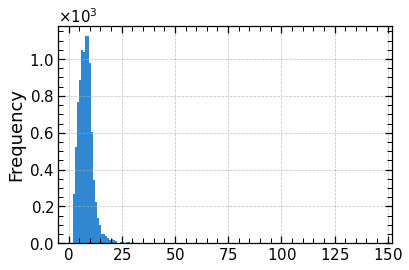

In [8]:
xcat.pos_r98.plot.hist(bins = 150)

In [8]:
xcat.columns

Index(['srcname_fin', 'RA_fin', 'DEC_fin', 'GLON', 'GLAT', 'pos_r98',
       'DET_LIKE_0', 'ML_FLUX_0', 'ML_FLUX_ERR_0', 'ML_CTS_0', 'ML_CTS_ERR_0',
       'ML_EXP_1', 'EXT', 'EXT_LIKE', 'EXT_ERR', 'ID_SRC', 'ID_CLUSTER', 'RA',
       'DEC', 'RADEC_ERR', 'DIST_NN', 'SRCDENS', 'TSTART', 'TSTOP',
       'EXT_LOWERR', 'EXT_UPERR', 'ML_RATE_0', 'ML_RATE_ERR_0', 'ML_BKG_0',
       'RA_corr', 'DEC_corr', 'g_id', 'g_d2d', 'g_nsrc', 'g_s', 'g_gmag',
       'g_maxLx', 'g_b', 's_id', 's_z', 's_otype', 's_d2d', 's_nsrc',
       'flag_xray', 'flag_radio', 'flag_agn_wise', 'w1', 'w2', 'w3', 'w1snr',
       'w2snr', 'w3snr', 'w_nsrc', 'sdss_nsrc', 'sdss_p', 'sdss_id', 'sdss_sp',
       'sdss_d2d', 'hpidx', 'RADEC_ERR_fin', 'pos_sigma_2d', 'pos_r68',
       'pos_r95', 'ELON', 'ELAT', 'flux_05-20', 'NH'],
      dtype='object')

In [9]:
xcat.iloc[0].sdss_id

1237658303278743603

In [10]:
xcat.iloc[0].RADEC_ERR_fin

0.31853032

In [6]:
xcat.iloc[0]

srcname_fin     SRGe J103744.3+571156
RA_fin                     159.434594
DEC_fin                     57.198788
GLON                       151.771105
GLAT                        51.782607
                        ...          
pos_r95                      1.786149
ELON                       134.901685
ELAT                        44.066998
flux_05-20                        0.0
NH             54517549599082561536.0
Name: 0, Length: 67, dtype: object

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 58785.208125 from DATE-OBS.
Set MJD-END to 58810.875104 from DATE-END'. [astropy.wcs.wcs]


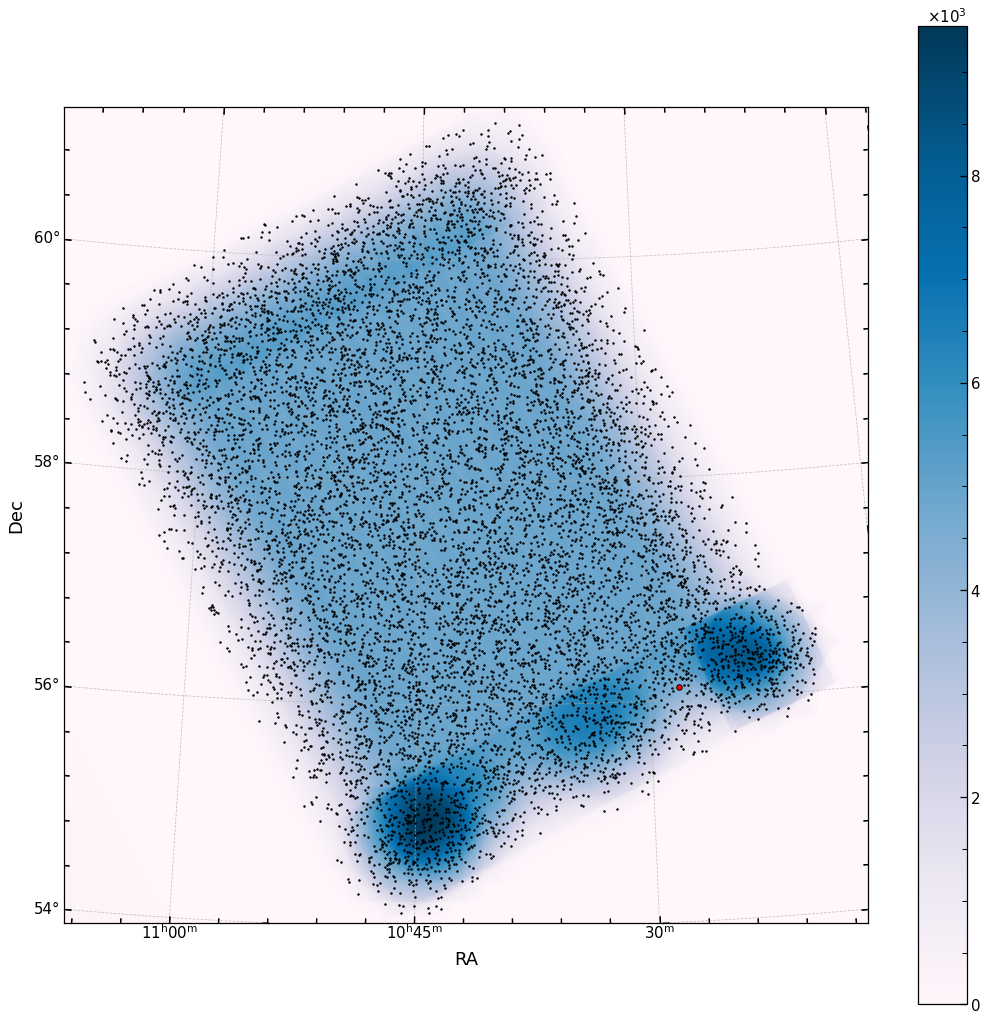

In [5]:
expo_fits, expo_map, wcs_expo, coords_xcat= get_expo_map(exp_map_file='old_cat/exp_img.fits', xcat=xcat, plot=True, plot_star_idx=8498)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 58785.208125 from DATE-OBS.
Set MJD-END to 58810.875104 from DATE-END'. [astropy.wcs.wcs]


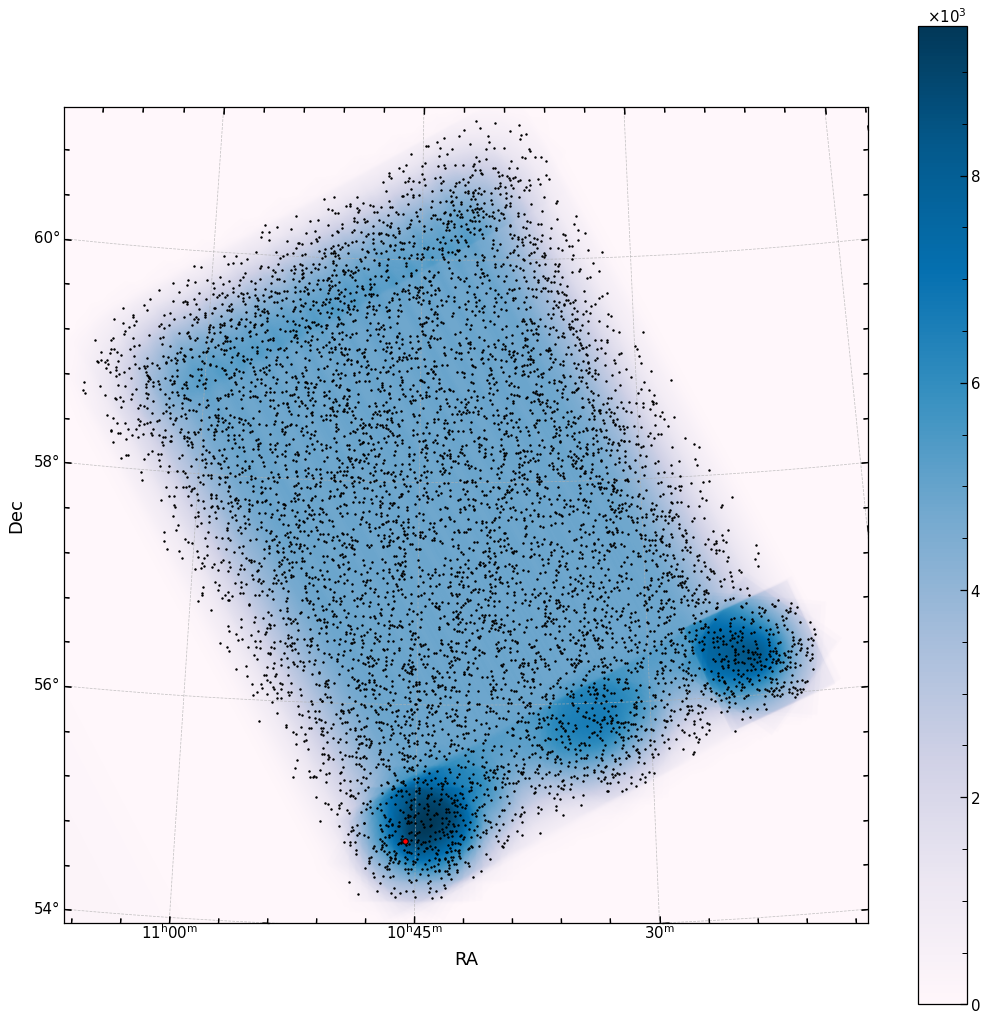

In [5]:
expo_fits, expo_map, wcs_expo, coords_xcat= get_expo_map(exp_map_file='old_cat/exp_img.fits', xcat=xcat, plot=True, plot_star_idx=8498)

Get sensitivity map

In [9]:
pixarea =(expo_fits[0].header['CDELT2'])**2 #in deg^2
print('pixarea (deg^2):', pixarea)

expo_map_masked = np.ma.masked_where(expo_map<=0, expo_map)

lim_cts = 12#np.min(xcat.ML_CTS_0[xcat.ML_CTS_0<50])
print(lim_cts)

sens_rate = lim_cts/expo_map_masked

print('sensitivity_rate:', sens_rate)

pixarea (deg^2): 1.2345679380274324e-06
12
sensitivity_rate: [[0.07307471334934235 0.07304415851831436 0.07301842421293259 ... -- --
  --]
 [0.0730314776301384 0.07300124317407608 0.07297931611537933 ... -- -- --]
 [0.07298382371664047 0.07296310365200043 0.07294606417417526 ... -- --
  --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_22298/3252408802.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_22298/3252408802.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(sens_rate))
/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_22298/3252408802.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


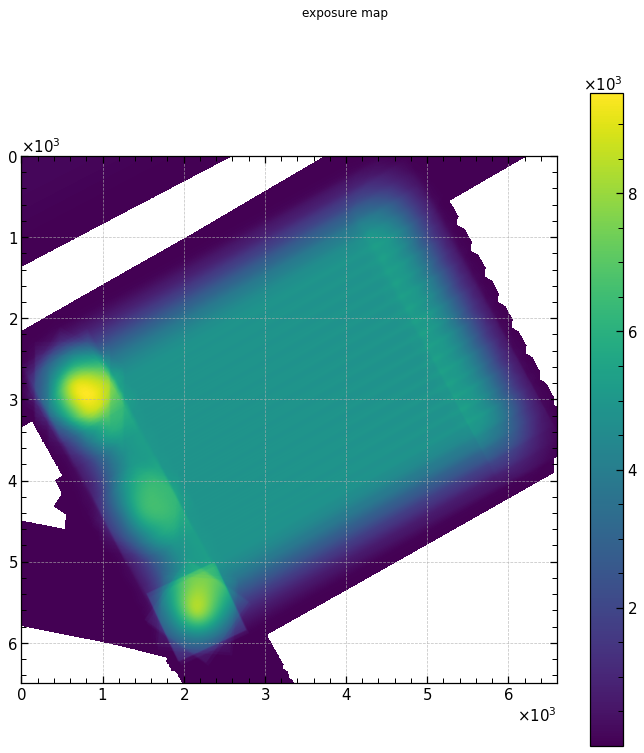

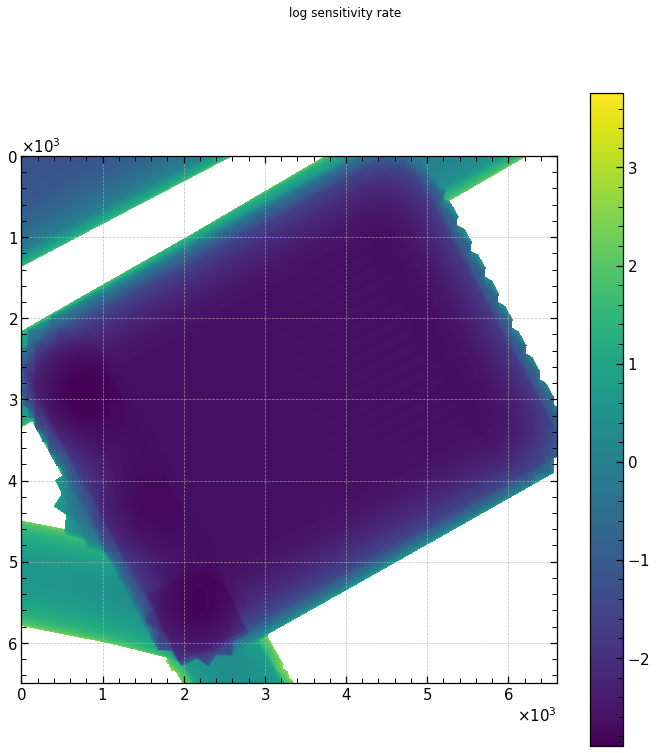

In [11]:
plt.figure(figsize=(12,12))
plt.imshow(expo_map_masked)
plt.suptitle('exposure map')
plt.colorbar()

plt.figure(figsize=(12,12))
plt.imshow(np.log10(sens_rate))
plt.suptitle('log sensitivity rate')
plt.colorbar()

Get limiting flux map

/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_22298/2964317563.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(sens_flux), vmin = np.log10(1e-15), vmax = -14.5)
/var/folders/hk/rctb6p8n16nbrbnjrwzrc8680000gp/T/ipykernel_22298/2964317563.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


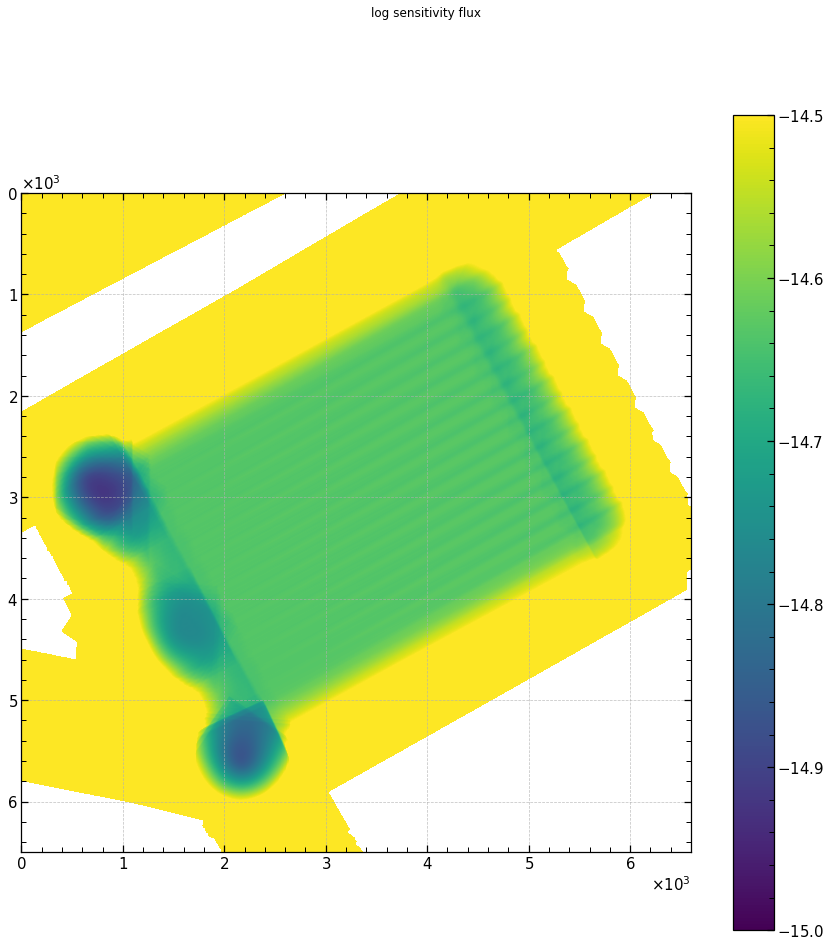

In [15]:
rates = xcat.ML_CTS_0/xcat.ML_EXP_1
flux2rate_ratio = xcat.ML_FLUX_0/rates
flux2rate_ratio = flux2rate_ratio[0]
assert flux2rate_ratio.std() == 0

sens_flux = sens_rate*flux2rate_ratio
np.min(sens_flux)

plt.figure(figsize=(15,15))
plt.imshow(np.log10(sens_flux), vmin = np.log10(1e-15), vmax = -14.5)
#plt.imshow(sens_flux, vmin = 1e-15, vmax = 1e-12)
plt.suptitle('log sensitivity flux')
plt.colorbar()

Flux-area curve from flux sensitivity map

In [19]:
fluxaxis = np.logspace(np.log10(np.min(sens_flux)), np.log10(np.min(5e-15)), 25)
n_pixs = []
for flux in tqdm(fluxaxis):
    n_pixs.append(np.sum(sens_flux<flux))
n_pixs = np.array(n_pixs)

100%|██████████| 25/25 [00:07<00:00,  3.18it/s]


[None, None, (0.1, 30)]

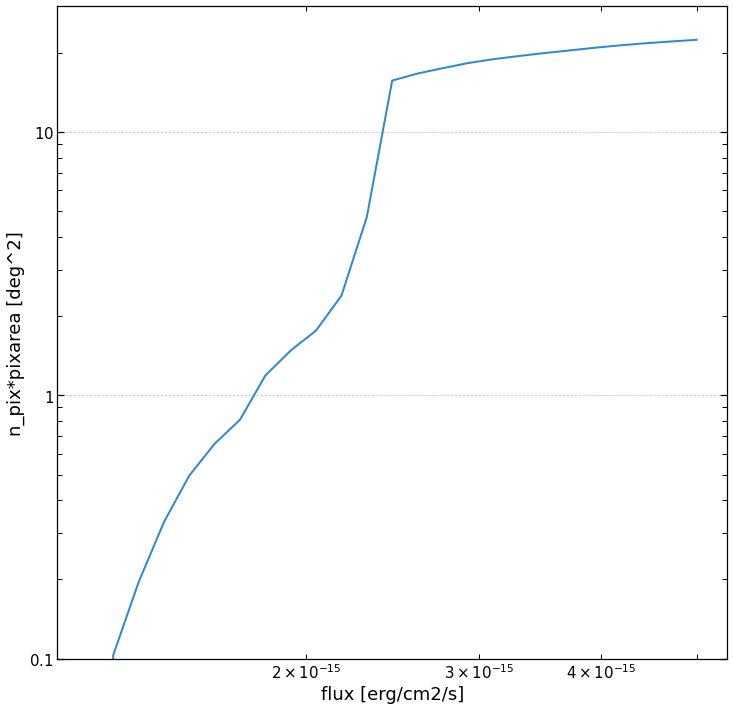

In [31]:
fig,  ax =  plt.subplots( figsize = (12,12))

sns.lineplot(x = fluxaxis, y = n_pixs*pixarea, linewidth=2);
ax.set_xlabel('flux [erg/cm2/s]')
ax.set_ylabel('n_pix*pixarea [deg^2]')
ax.set(xscale ='log', yscale = 'log', ylim=(0.1, 30))